### Importing the libraries

In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.18.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [137]:
from tensorflow.keras.datasets import mnist

In [138]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [139]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [140]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [141]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [142]:
y_train[0]

5

### Visualizing the images

In [144]:
np.random.randint(0, 59999)

46219

2


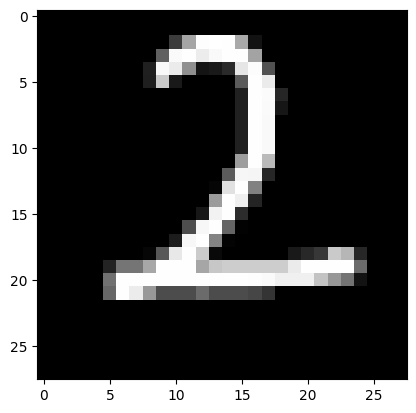

In [145]:
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [146]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

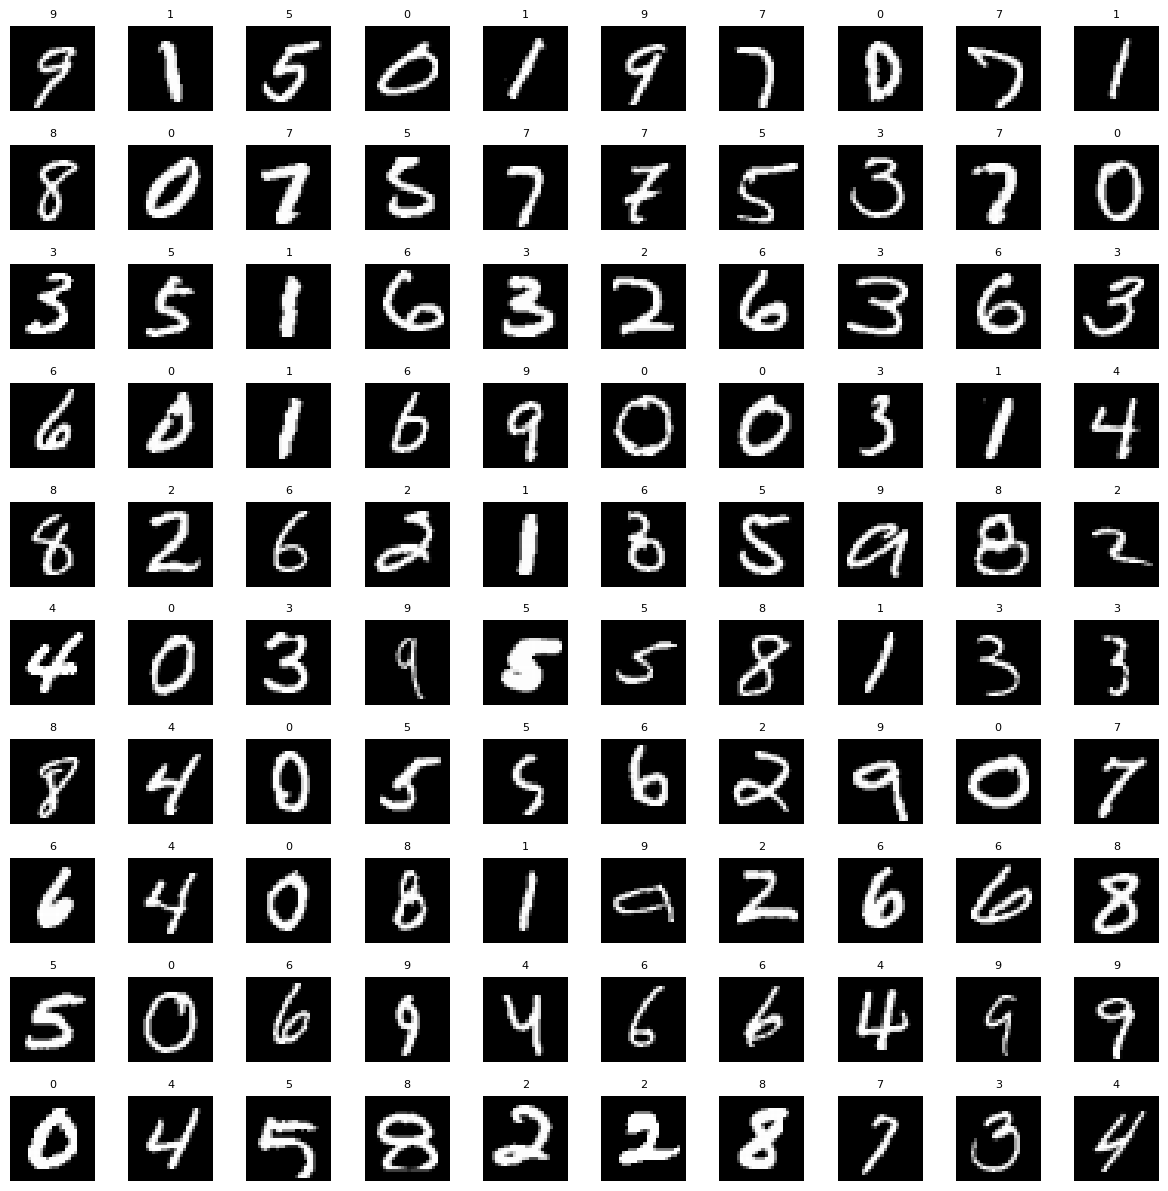

In [147]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0,width*height):
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [149]:
X_train.min(), X_train.max()

(0, 255)

In [150]:
X_train = X_train/255
X_test = X_test/255

In [151]:
X_train.min(), X_test.max()

(0.0, 1.0)

In [152]:
X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [153]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [154]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train.shape

(60000, 784)

In [155]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the autoencoder

In [157]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [158]:
autoencoder = Sequential()
autoencoder.add(Dense(units=128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [159]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [162]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0098 - loss: 0.2064
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0120 - loss: 0.1161
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0125 - loss: 0.1060
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0137 - loss: 0.1004
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0113 - loss: 0.0974
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0135 - loss: 0.0949
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0144 - loss: 0.0934
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0152 - loss: 0.0922
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0141 - loss: 0.0916
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0145 - loss: 0.0911
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0165 - loss: 0.0906
Epoch 12/50
1875/1875 ━━━━━━━━

### Encoding the images

In [164]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [175]:
autoencoder.get_layer('dense_9').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_28>

In [181]:
encoder = Model(inputs = autoencoder.get_layer('dense_7').input, outputs = autoencoder.get_layer('dense_9').output)

In [183]:
encoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

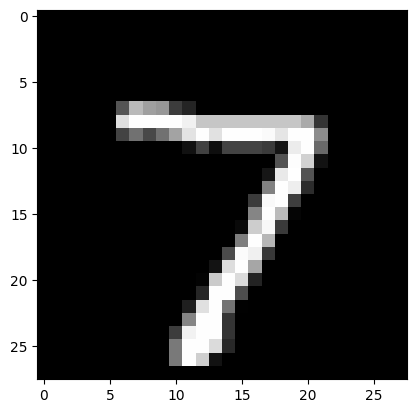

In [185]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

In [187]:
X_test[0].reshape(1,-1).shape

(1, 784)

In [191]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [193]:
encoded_image, encoded_image.shape

(array([[0.        , 0.97509676, 3.9424756 , 0.        , 0.        ,
         3.9037383 , 7.831454  , 4.5290036 , 5.285658  , 4.36205   ,
         3.2932446 , 0.        , 3.7166517 , 1.7418833 , 3.3461406 ,
         3.3739889 , 7.1299562 , 2.502828  , 1.905962  , 0.        ,
         9.194808  , 7.99607   , 0.        , 0.        , 0.        ,
         3.6649761 , 0.7125488 , 0.        , 5.103972  , 2.971638  ,
         0.        , 0.        ]], dtype=float32),
 (1, 32))

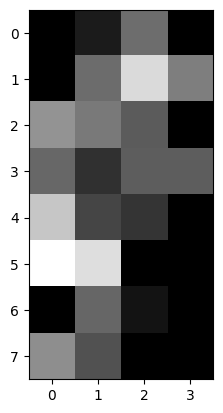

In [195]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray')

In [199]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [205]:
input_layer_decoder = Input(shape=(32, ))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs= input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()    

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

### Decoding the images

In [ ]:
autoencoder.summary()

In [211]:
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [213]:
decoded_image.shape

(1, 784)

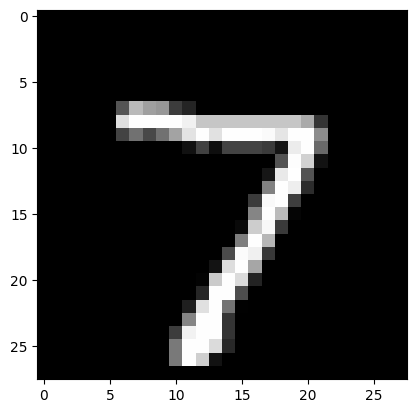

In [215]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

### Encoding and decoding the test images

In [219]:
X_test.shape[0]

10000

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
plt.figure(figsize=18,18))
for i, image_index in enumerate(test_images):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())


    ax = plt.subplot(10,10,i+1+n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    ax = plt.subplot(10,10,i+1+n_images*2)
    plt.imshow(decoder.predict(encoded_image)